<a href="https://colab.research.google.com/github/Roshinivemuluri/Roshini-data-analytics-training/blob/main/Mini%20Project(05-12-2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [84]:
 #TASK-01 READING THE DATASET
data=pd.read_csv('/content/dataset.csv')

In [85]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
#TASK-02 CHECKING MISSING VALUES & IF THERE
# prompt: Using dataframe data: CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

# Check for missing values in the DataFrame
print(data.isnull().sum())

# Check for duplicate rows in the DataFrame
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")
# Display the duplicate rows (optional)
# print(data[data.duplicated()])


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Number of duplicate rows: 0


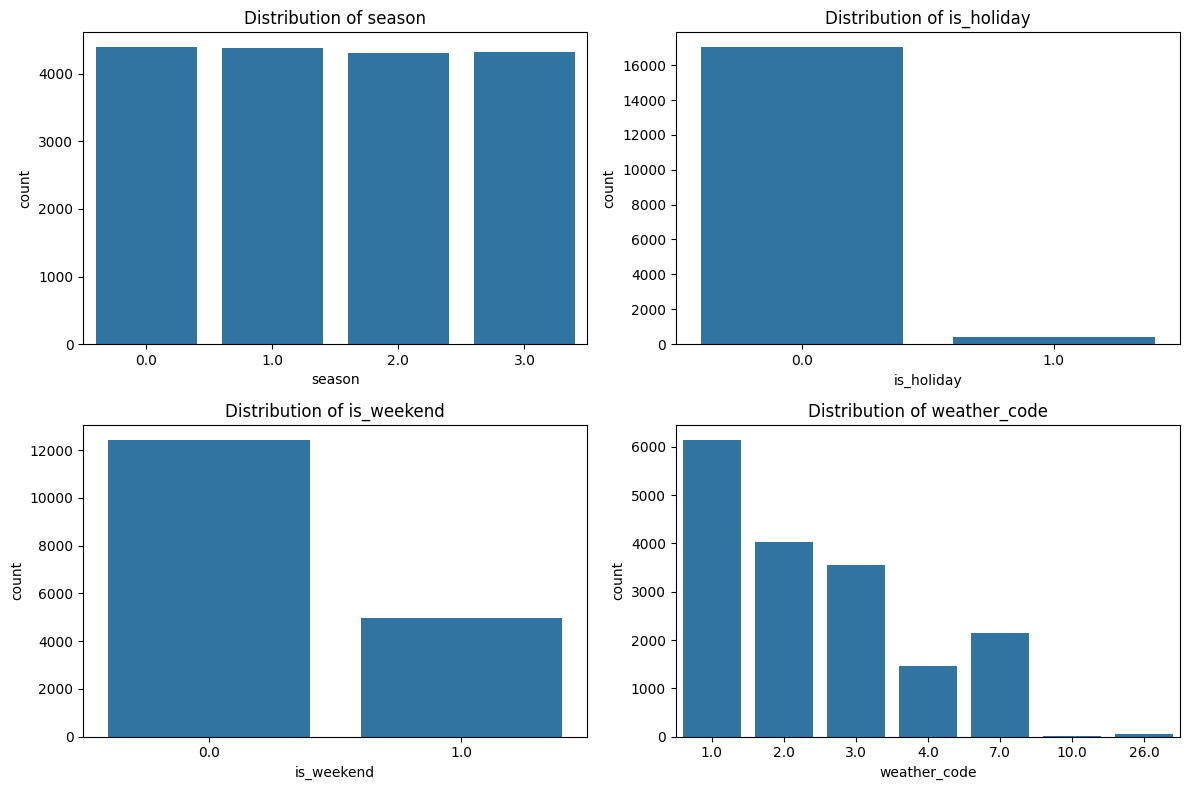

In [12]:
#TASK-03 DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE
# prompt: Using dataframe data: PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

import matplotlib.pyplot as plt
import seaborn as sns

# List of discrete features to plot
discrete_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through features and create plots
for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [42]:
#TASK-04 LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX
# Check if 'timestamp' is already the index
if 'timestamp' not in data.columns:
    # If 'timestamp' is not a column, it's likely the index
    # Reset the index to make 'timestamp' a column again
    # drop=True to avoid inserting the existing index as a new column
    data = data.reset_index(drop=True)
    # Rename the 'index' column (if it exists) to 'timestamp'
    if 'index' in data.columns:
        data = data.rename(columns={'index': 'timestamp'})

# Convert 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set the 'timestamp' column as the index of the DataFrame
data = data.set_index('timestamp')
print(data)

                               level_0                    0     1    2    3  \
timestamp                                                                     
1970-01-01 00:00:00.000000000        0            timestamp   cnt   t1   t2   
1970-01-01 00:00:00.000000001        1  2015-01-04 00:00:00   182  3.0  2.0   
1970-01-01 00:00:00.000000002        2  2015-01-04 01:00:00   138  3.0  2.5   
1970-01-01 00:00:00.000000003        3  2015-01-04 02:00:00   134  2.5  2.5   
1970-01-01 00:00:00.000000004        4  2015-01-04 03:00:00    72  2.0  2.0   
...                                ...                  ...   ...  ...  ...   
1970-01-01 00:00:00.000017410    17410  2017-01-03 19:00:00  1042  5.0  1.0   
1970-01-01 00:00:00.000017411    17411  2017-01-03 20:00:00   541  5.0  1.0   
1970-01-01 00:00:00.000017412    17412  2017-01-03 21:00:00   337  5.5  1.5   
1970-01-01 00:00:00.000017413    17413  2017-01-03 22:00:00   224  5.5  1.5   
1970-01-01 00:00:00.000017414    17414  2017-01-03 2

In [49]:
#TASK-05 MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.
import pandas as pd

# Check if 'timestamp' is already a column, if not, reset the index
if 'timestamp' not in data.columns:
    data = data.reset_index()
    # Rename 'index' column to 'timestamp' if it exists
    if 'index' in data.columns:
        data = data.rename(columns={'index': 'timestamp'})

# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract features using .assign() for cleaner code
data = data.assign(
    day_of_week=data['timestamp'].dt.dayofweek,  # Day of the week (0=Monday, 6=Sunday)
    day_of_month=data['timestamp'].dt.day,       # Day of the month (1-31)
    hour=data['timestamp'].dt.hour,             # Hour of the day (0-23)
    month=data['timestamp'].dt.month,           # Month of the year (1-12)
    year=data['timestamp'].dt.year              # Year
)

# Define a function to determine the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Apply the function to create the season column
data['season'] = data['month'].apply(get_season)

# Optionally set 'timestamp' back as the index
# data = data.set_index('timestamp')

# Display the updated DataFrame (optional)
print(data.head())

                      timestamp  level_0                    0    1    2    3  \
0 1970-01-01 00:00:00.000000000        0            timestamp  cnt   t1   t2   
1 1970-01-01 00:00:00.000000001        1  2015-01-04 00:00:00  182  3.0  2.0   
2 1970-01-01 00:00:00.000000002        2  2015-01-04 01:00:00  138  3.0  2.5   
3 1970-01-01 00:00:00.000000003        3  2015-01-04 02:00:00  134  2.5  2.5   
4 1970-01-01 00:00:00.000000004        4  2015-01-04 03:00:00   72  2.0  2.0   

       4           5             6           7           8       9  \
0    hum  wind_speed  weather_code  is_holiday  is_weekend  season   
1   93.0         6.0           3.0         0.0         1.0     3.0   
2   93.0         5.0           1.0         0.0         1.0     3.0   
3   96.5         0.0           1.0         0.0         1.0     3.0   
4  100.0         0.0           1.0         0.0         1.0     3.0   

   day_of_week  day_of_month  hour  month  year  season  
0            3             1     0      

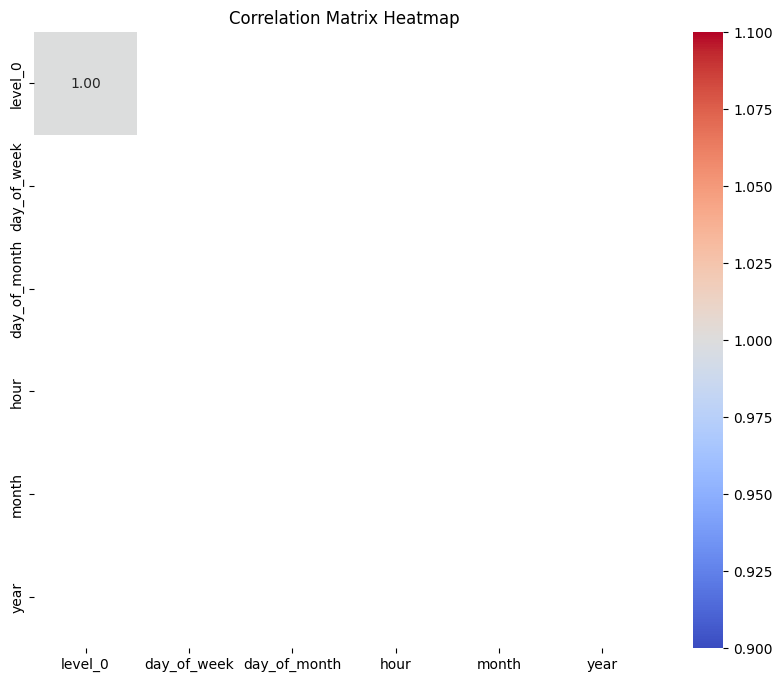

In [50]:
#TASK-06 VISUALIZING THE CORRELATION WITH A HEATMAP
# prompt: Using dataframe data: VISUALIZING THE CORRELATION WITH A HEATMAP

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your Pandas DataFrame
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


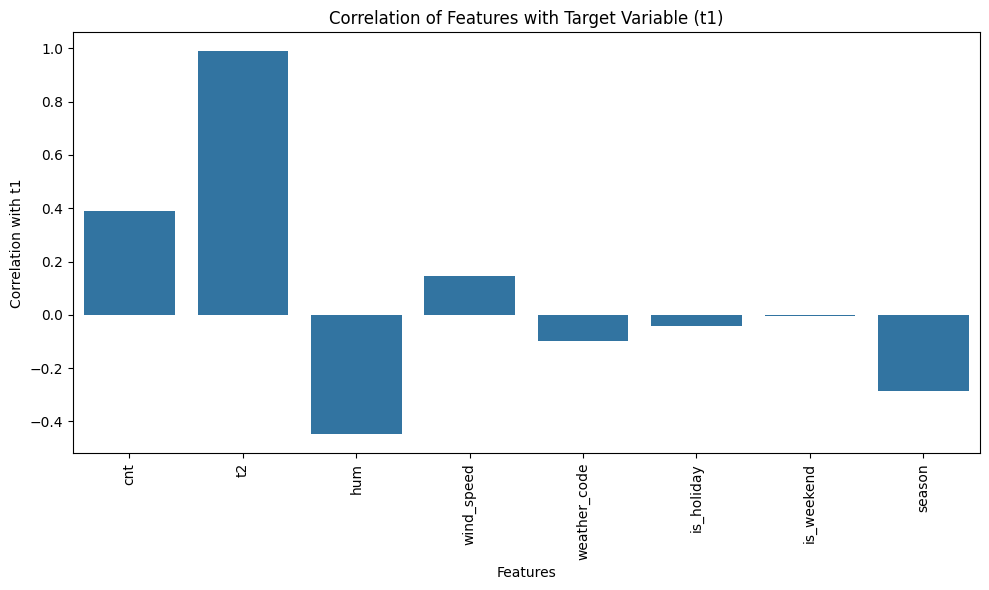

In [75]:
 #Task-7 VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('/content/dataset.csv')

# Ensure column names are stripped of whitespace
data.columns = data.columns.str.strip()

# *** Replace 'cnt' with the actual name of your target variable column ***
target_variable = 't1'  # Example: Replace 't1' with your target column name

# Check if the target variable column exists
if target_variable not in data.columns:
    raise KeyError(f"The column '{target_variable}' does not exist in the DataFrame. Please check your data.")

# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=['number']).columns

# Ensure target_variable is in the numerical features
if target_variable not in numerical_features:
    raise ValueError(f"'{target_variable}' column is not numerical or is missing in the dataset.")

# Calculate the correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

# Extract the correlations with the target variable column
correlations = corr_matrix[target_variable].drop(target_variable)  # Exclude self-correlation

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel(f'Correlation with {target_variable}')
plt.title(f'Correlation of Features with Target Variable ({target_variable})')
plt.tight_layout()
plt.show()

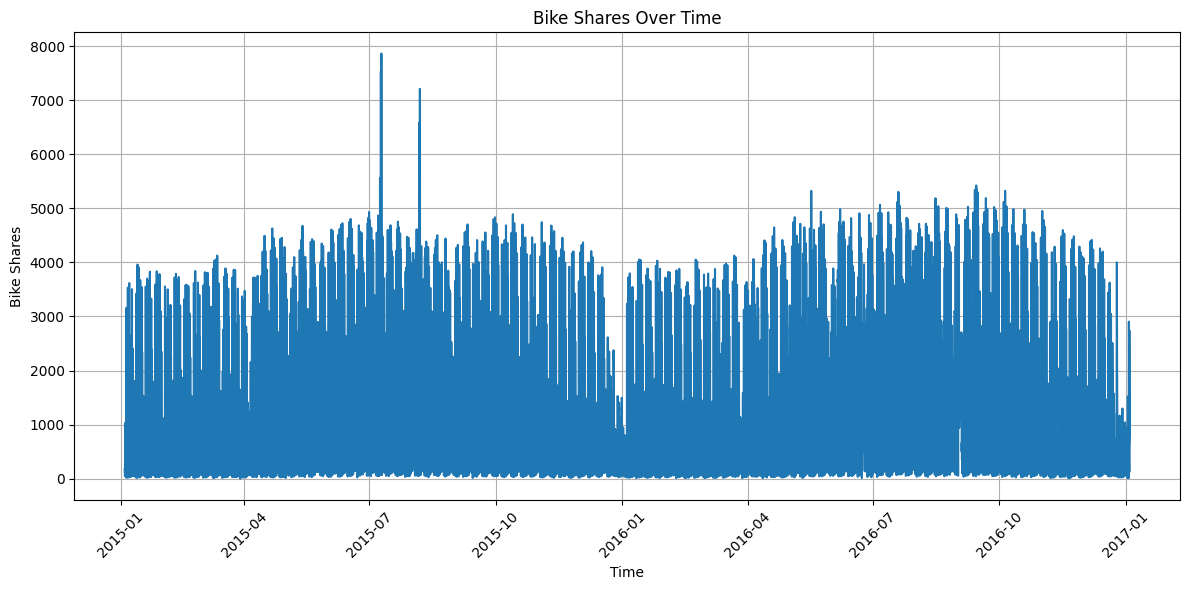

In [76]:
#TASK-08 PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT
# prompt: Using dataframe data: PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['cnt'])

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


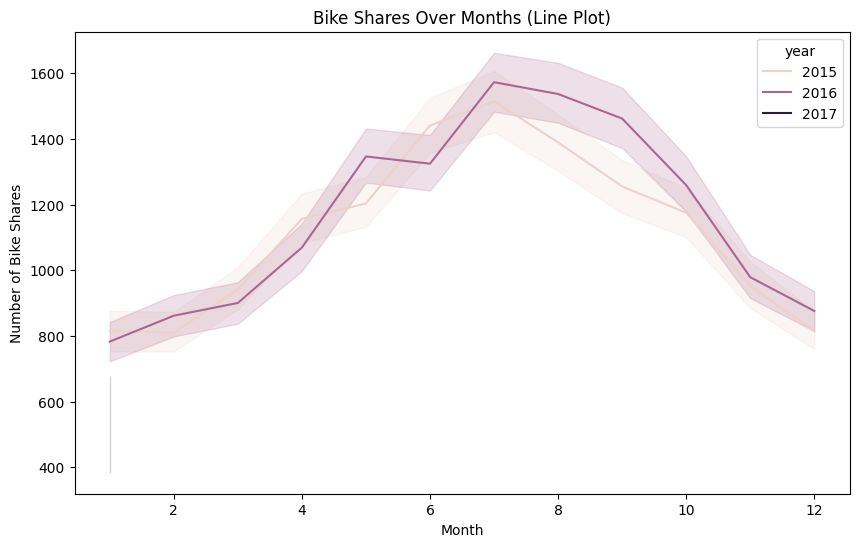

<ipython-input-77-991d8b79e8ba>:25: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='month', y='cnt', data=data, hue='year', join=False)


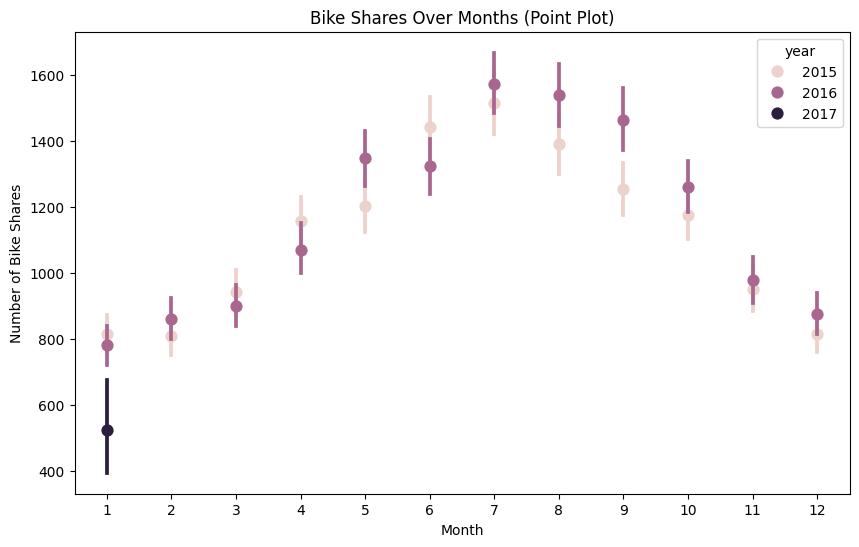

<ipython-input-77-991d8b79e8ba>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='cnt', hue='year', data=data, ci=None) # ci=None removes confidence interval


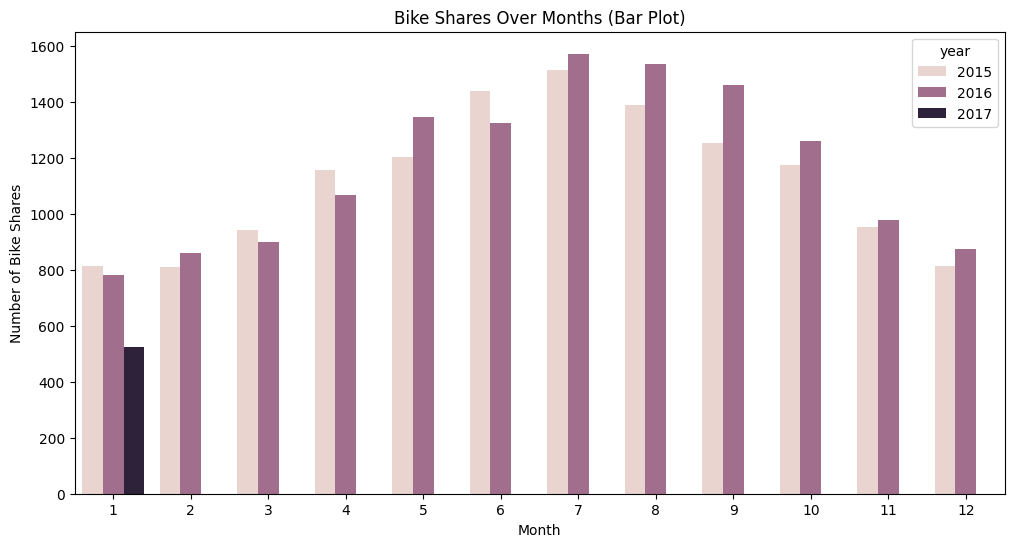

In [77]:
#TASK-09 PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create new columns for month and year of month
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year


# Lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='cnt', data=data, hue='year')
plt.title('Bike Shares Over Months (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Bike Shares')
plt.show()

# Pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x='month', y='cnt', data=data, hue='year', join=False)
plt.title('Bike Shares Over Months (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Bike Shares')
plt.show()

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year', data=data, ci=None) # ci=None removes confidence interval
plt.title('Bike Shares Over Months (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Bike Shares')
plt.show()


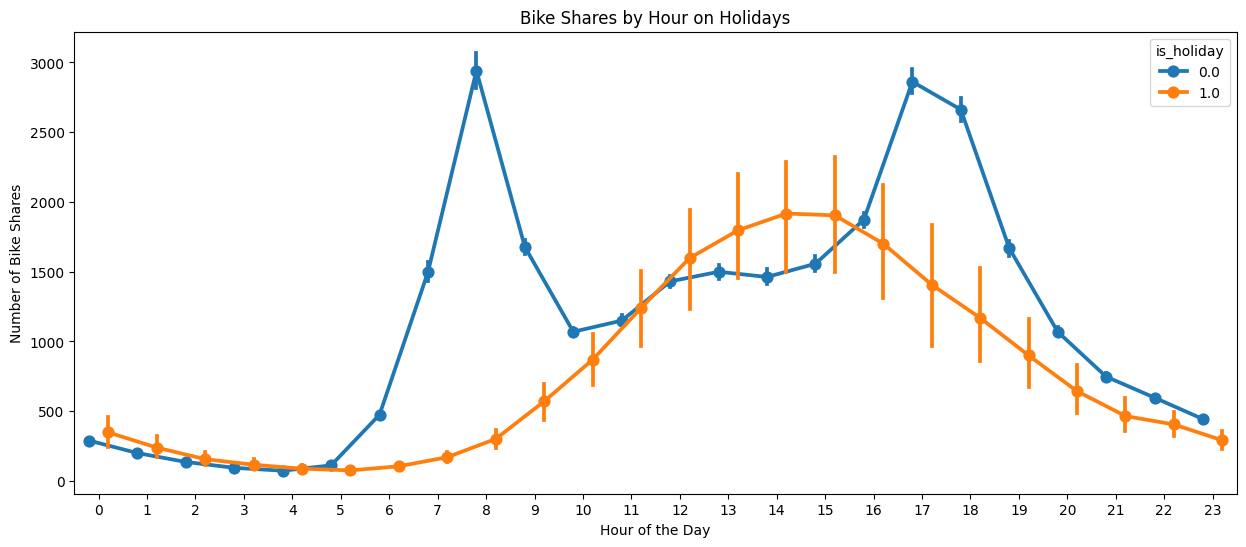

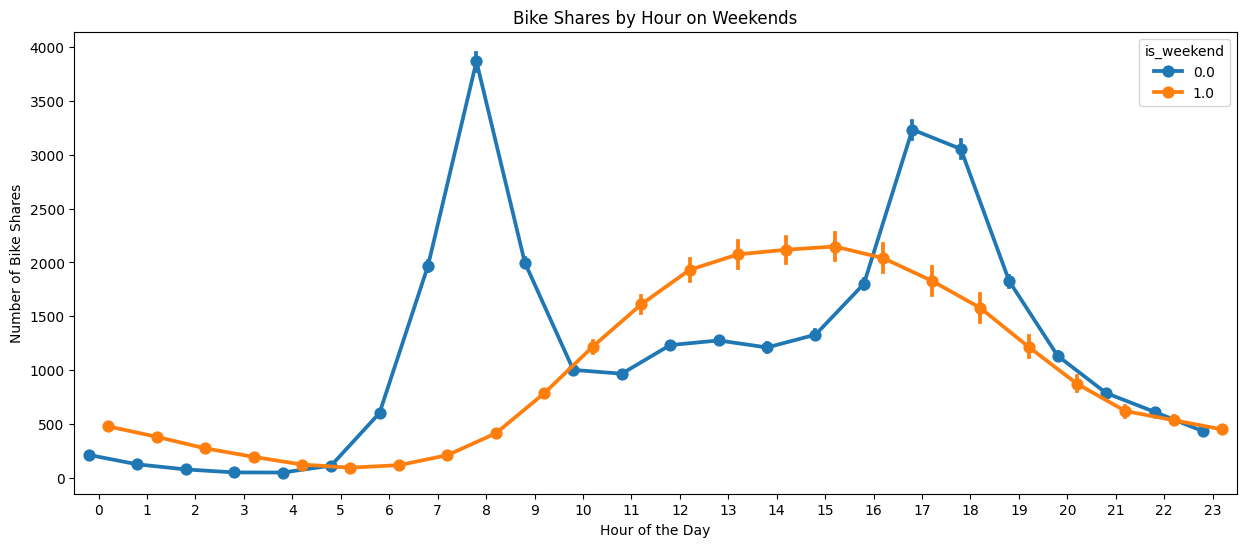

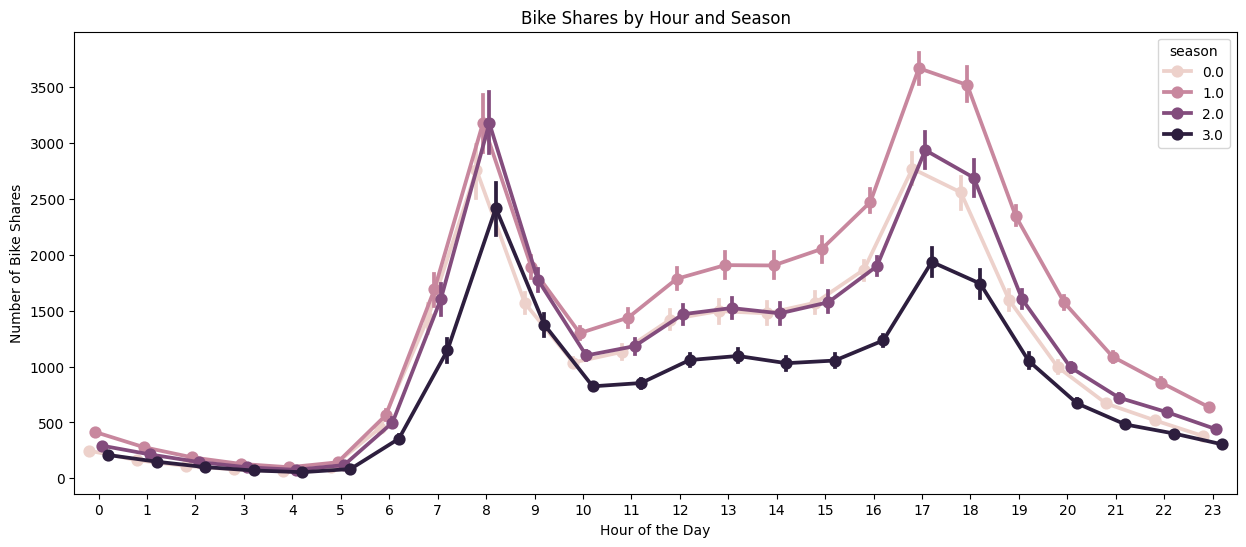

In [78]:
#TASK-10 PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timestamp to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract hour from timestamp
data['hour'] = data['timestamp'].dt.hour

# Create the plot
plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='is_holiday', data=data, dodge=0.4)
plt.title('Bike Shares by Hour on Holidays')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()

plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='is_weekend', data=data, dodge=0.4)
plt.title('Bike Shares by Hour on Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()

plt.figure(figsize=(15, 6))
sns.pointplot(x='hour', y='cnt', hue='season', data=data, dodge=0.4)
plt.title('Bike Shares by Hour and Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Shares')
plt.show()


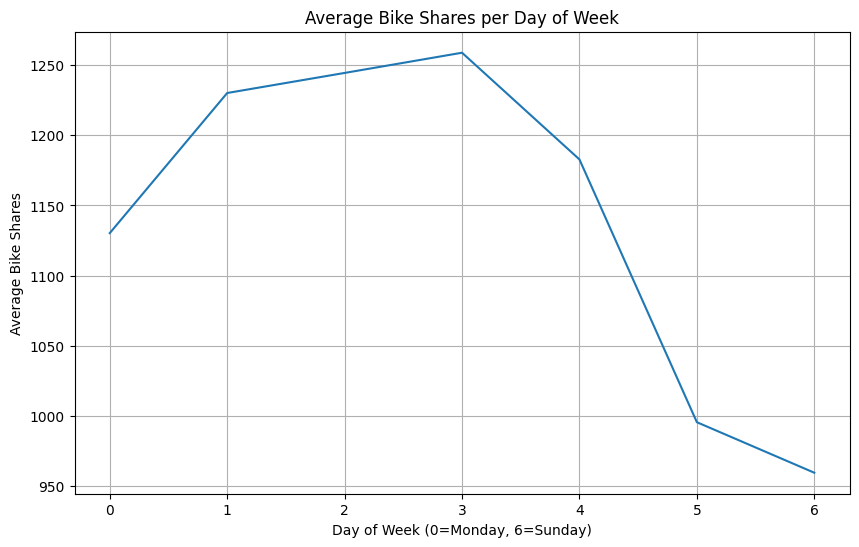

In [79]:
#TASK-11 PLOTTING BIKE SHARES BY DAY OF WEEK
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY DAY OF WEEK

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime objects if it's not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the day of the week (0=Monday, 6=Sunday)
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Group by day of the week and calculate the mean bike share count
bike_shares_by_day = data.groupby('day_of_week')['cnt'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(bike_shares_by_day.index, bike_shares_by_day.values)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Bike Shares')
plt.title('Average Bike Shares per Day of Week')
plt.xticks(range(7))  # Ensure all days of the week are displayed
plt.grid(True)
plt.show()


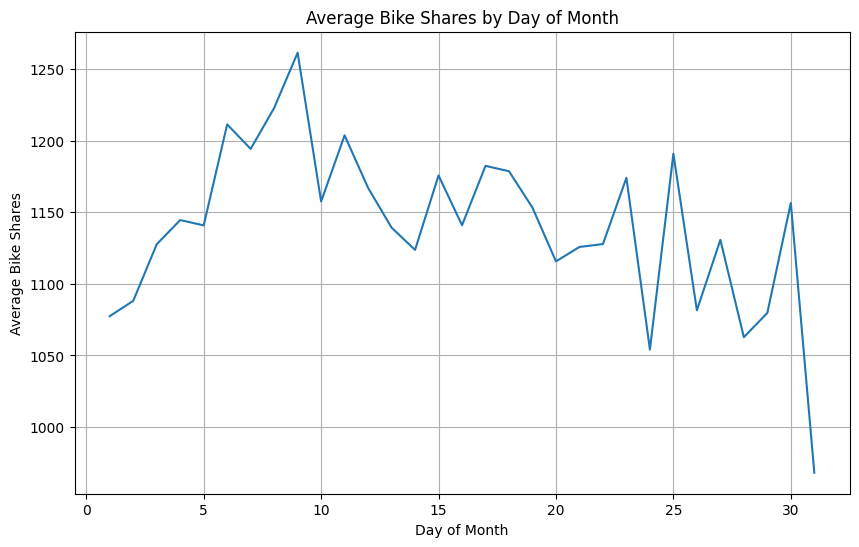

In [80]:
#TASK-12 PLOTTING BIKE SHARES BY DAY OF MONTH
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY DAY OF MONTH

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'timestamp' column to datetime objects if it's not already
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the day of the month
data['day_of_month'] = data['timestamp'].dt.day

# Group by day of the month and calculate the mean bike shares
daily_bike_shares = data.groupby('day_of_month')['cnt'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(daily_bike_shares.index, daily_bike_shares.values)
plt.xlabel('Day of Month')
plt.ylabel('Average Bike Shares')
plt.title('Average Bike Shares by Day of Month')
plt.grid(True)
plt.show()


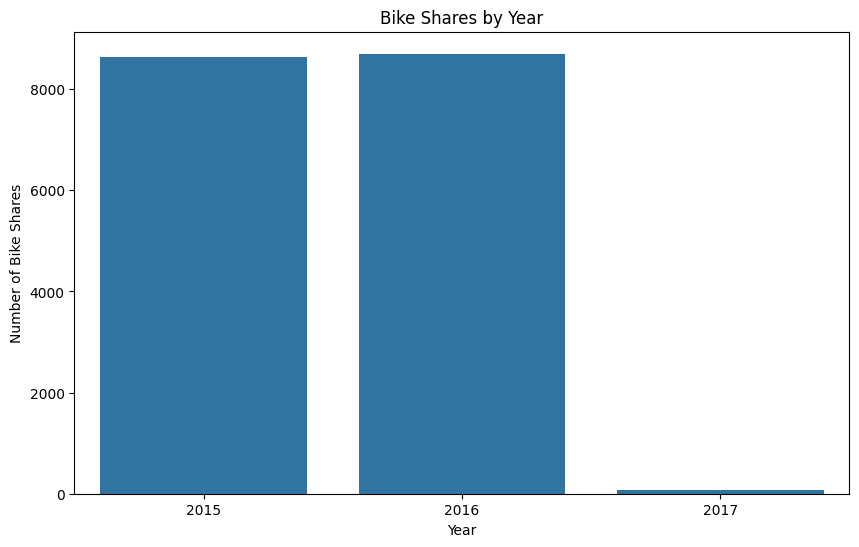

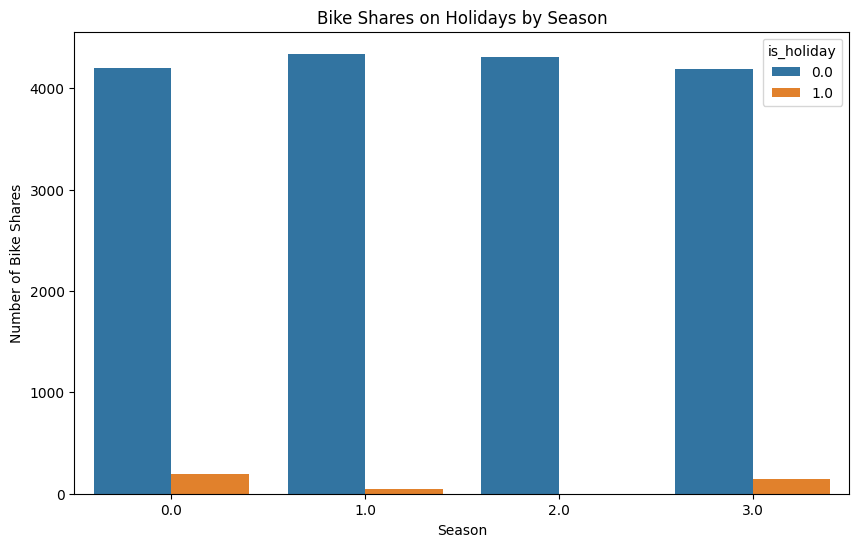

In [81]:
#TASK-13 PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON
# prompt: Using dataframe data: PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bike shares by year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data)
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Number of Bike Shares')
plt.show()


# Plotting bike shares on holidays by season
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='is_holiday', data=data)
plt.title('Bike Shares on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Shares')
plt.show()

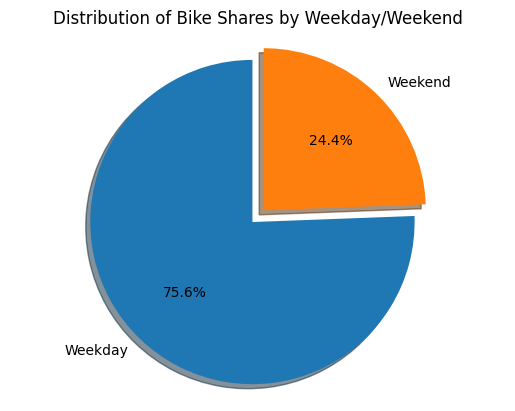

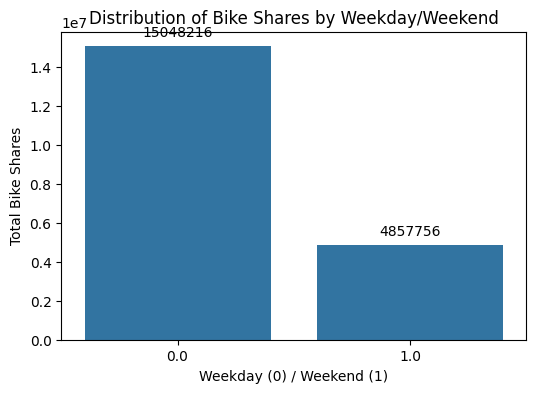

In [82]:
#TASK-14 VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT
# prompt: Using dataframe data: VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total bike shares for weekdays and weekends
weekday_share = data[data['is_weekend'] == 0]['cnt'].sum()
weekend_share = data[data['is_weekend'] == 1]['cnt'].sum()


# Create a pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_share, weekend_share]
explode = (0.1, 0)  # explode the 1st slice

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.show()


# Create a bar plot
share_by_day = data.groupby('is_weekend')['cnt'].sum()
share_by_day = share_by_day.reset_index()
plt.figure(figsize=(6,4))
ax = sns.barplot(x="is_weekend", y="cnt", data=share_by_day)
plt.title("Distribution of Bike Shares by Weekday/Weekend")
plt.xlabel("Weekday (0) / Weekend (1)")
plt.ylabel("Total Bike Shares")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


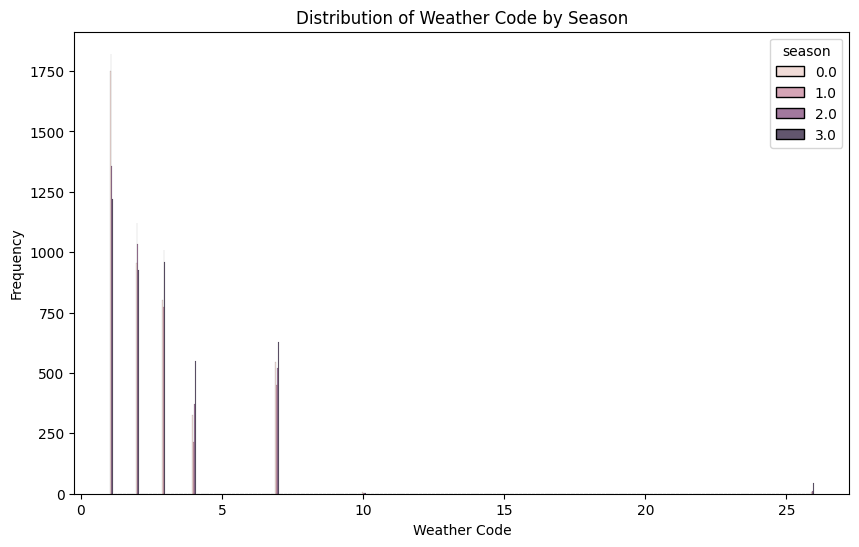

In [83]:
#TASK-15 PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON
# prompt: Using dataframe data: PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=data, x='weather_code', hue='season', multiple='dodge', shrink=.8)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Weather Code')
plt.ylabel('Frequency')
plt.show()
